In [4]:
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
import seaborn as sns
import statsmodels.api as sm
import yfinance as yf

sns.set_style("whitegrid" )
import datetime as dt


In [16]:
_start = dt.datetime(2019, 1, 1).date()
_end = dt.datetime(2024, 9, 9).date()
print(f"start: {_start}\nend: {_end}")

start: 2019-01-01
end: 2024-09-09


In [17]:
rfr = pdr.FredReader("TB4WK", start=_start, end=_end, ).read()
# print(rfr.read())
rfr


,TB4WK
DATE,
2019-01-01,2.36
2019-02-01,2.39
2019-03-01,2.41
2019-04-01,2.38
2019-05-01,2.36
...,...
2024-04-01,5.28
2024-05-01,5.27
2024-06-01,5.25


In [14]:
mkt = yf.download("SPY", start=_start, end=_end, auto_adjust=True, rounding=True )
mkt

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03,458.77,460.26,456.41,460.13,72668200
2022-01-04,461.58,462.31,458.08,459.97,71178700
2022-01-05,459.60,460.39,451.04,451.14,104538900
2022-01-06,450.67,453.49,448.30,450.72,86858900
2022-01-07,450.73,451.93,447.55,448.94,85111600
...,...,...,...,...,...
2024-08-30,560.77,564.20,557.14,563.68,62700100
2024-09-03,560.47,560.81,549.51,552.08,60600100
2024-09-04,550.20,554.43,549.46,550.95,47224900


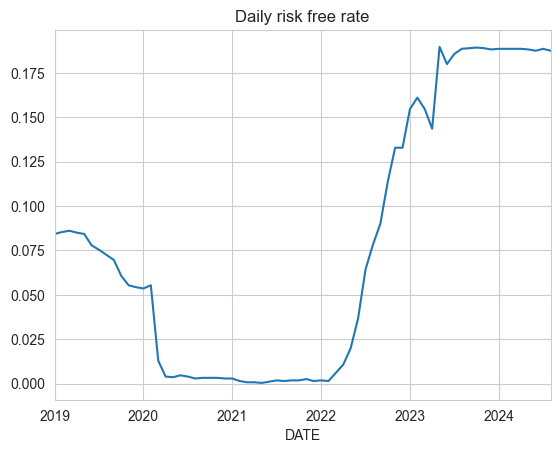

In [18]:
rfr_scaling = 28  # need to scale the risk free rate by its maturity to get the daily risk-free rate.
_rfr = rfr["TB4WK"].dropna()/rfr_scaling
_rfr.plot()

plt.title("Daily risk free rate")
plt.show()

c:\Users\eorlo\.pyenv\pyenv-win\versions\3.12.0\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Descriptive stats of the markets daily percentage returns: count    672.000000
mean       0.030379
std        1.136829
min       -4.348153
25%       -0.609778
50%        0.038835
75%        0.701875
max        5.494747
Name: Close, dtype: float64


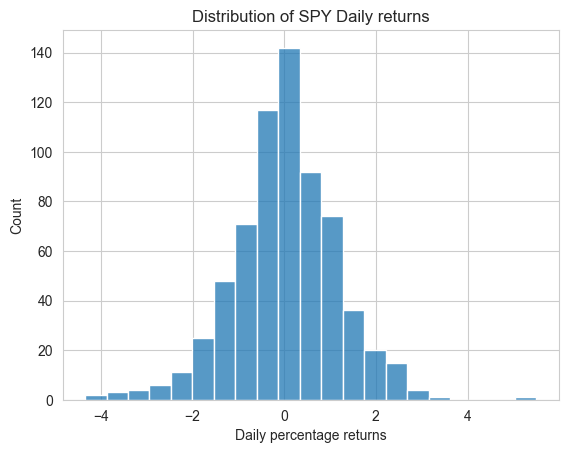

In [21]:
mkt_returns = mkt['Close'].pct_change() * 100
mkt_returns = mkt_returns.dropna()

# plt.hist(mkt_returns, bins = 21)
sns.histplot(mkt_returns, bins=21)
plt.title("Distribution of SPY Daily returns")
plt.xlabel("Daily percentage returns")
print(f"Descriptive stats of the markets daily percentage returns: {mkt_returns.describe()}")

In [22]:
_aapl = yf.download("AAPL", start=_start, end=_end, auto_adjust=False, rounding=True)
_aapl

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.72,39.71,38.56,39.48,37.75,148158800
2019-01-03,35.99,36.43,35.50,35.55,33.99,365248800
2019-01-04,36.13,37.14,35.95,37.06,35.44,234428400
2019-01-07,37.17,37.21,36.47,36.98,35.36,219111200
2019-01-08,37.39,37.96,37.13,37.69,36.04,164101200
...,...,...,...,...,...,...
2024-08-30,230.19,230.40,227.48,229.00,229.00,52990800
2024-09-03,228.55,229.00,221.17,222.77,222.77,50190600
2024-09-04,221.66,221.78,217.48,220.85,220.85,43840200


In [23]:
_aapl_ret = (
    (_aapl["Adj Close"].pct_change() * 100)
    .dropna()
)
_aapl_ret

Date
2019-01-03   -9.960265
2019-01-04    4.265961
2019-01-07   -0.225734
2019-01-08    1.923077
2019-01-09    1.692564
                ...   
2024-08-30   -0.343792
2024-09-03   -2.720524
2024-09-04   -0.861875
2024-09-05    0.692778
2024-09-06   -0.701502
Name: Adj Close, Length: 1429, dtype: float64

In [24]:
__aapl_ret =(_aapl["Adj Close"].pct_change() * 100).dropna()

__aapl_ret

Date
2019-01-03   -9.960265
2019-01-04    4.265961
2019-01-07   -0.225734
2019-01-08    1.923077
2019-01-09    1.692564
                ...   
2024-08-30   -0.343792
2024-09-03   -2.720524
2024-09-04   -0.861875
2024-09-05    0.692778
2024-09-06   -0.701502
Name: Adj Close, Length: 1429, dtype: float64

Descriptive stats of Apples daily returns: count    1429.000000
mean        0.143223
std         1.977268
min       -12.867919
25%        -0.812719
50%         0.146822
75%         1.210342
max        11.992712
Name: Adj Close, dtype: float64


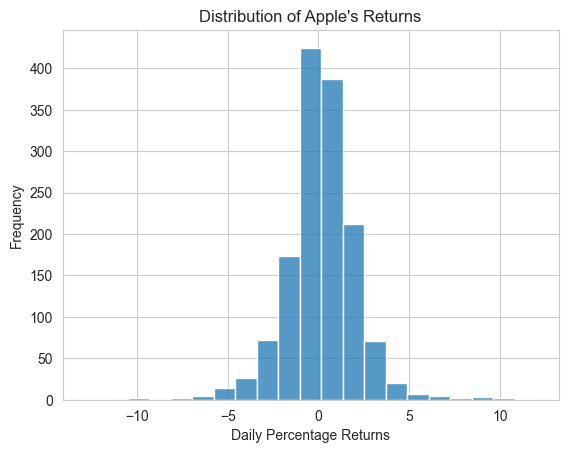

In [27]:
# sns.histplot(__aapl_ret, bins = 21).properties({"title": "Distribution of Apple\'s Daily Returns", "xlabel":  "Daily Percentage Returns", "ylabel": "Frequency"})
sns.histplot(__aapl_ret, bins = 21).set_title("Distribution of Apple\'s Returns")
plt.xlabel("Daily Percentage Returns")
plt.ylabel("Frequency")
print(f"Descriptive stats of Apples daily returns: {__aapl_ret.describe()}")

ValueError: The indices for endog and exog are not aligned

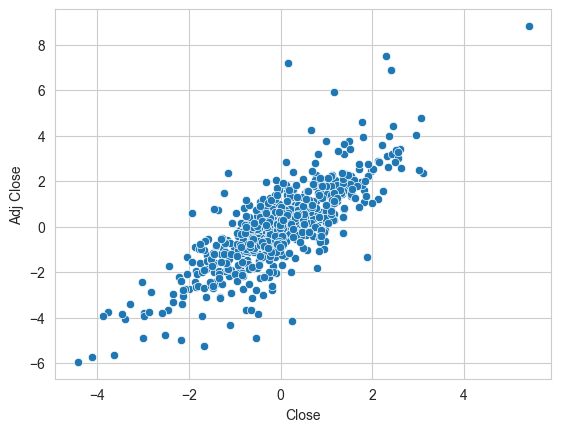

In [31]:
_y = __aapl_ret - _rfr.mean()
_x = mkt_returns - _rfr.mean()
sns.scatterplot(x = _x, y = _y)

x = sm.add_constant(_x)
mkt_model = sm.OLS(y, x).fit()

plt.plot(x, x*mkt_model.params[1] + mkt_model.params[0])
plt.title("Market Model of AAPL")
plt.xlabel("SPY Daily Xs returns")
plt.ylabel("AAPL Daily Xs returns")
plt.show()

print(f"Descriptive stats of AAPLs Market model, the security had a realized alpha of {round(mkt_model.params[0], 2)}% and Beta of {1}")